In [2]:
from collections import Counter
from sklearn.cluster import KMeans   
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def rgb_to_hex(rgb_color):  #int values to hex values
    hex_color = '#'
    for i in rgb_color:
        i=int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [4]:
rgb_to_hex((255,0,0))

'#ff0000'

In [5]:
img_name = 'img7.jpg'
raw_image = cv2.imread(img_name)
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)  #cv2 will read in BGR format so convert to RGB format

In [6]:
img = cv2.resize(raw_image, (900,600), interpolation=cv2.INTER_AREA) #specifying particular height width for image
img.shape                                                            #inter area for reducing size

(600, 900, 3)

In [7]:
img=img.reshape(img.shape[0]*img.shape[1],3)                         #to get 2 dimensional array and provide to KMeans
img.shape                                                            #reshaping the array without changing the data

(540000, 3)

In [8]:
img

array([[ 73, 101, 128],
       [161, 193, 223],
       [158, 194, 228],
       ...,
       [ 54,  79, 120],
       [ 54,  80, 118],
       [ 25,  51,  89]], dtype=uint8)

In [9]:
clf = KMeans(n_clusters=5)     #number of colors to display or number of groups
color_labels = clf.fit_predict(img)  #analysis of colors or all colors getting grouped
center_colors=clf.cluster_centers_   #getting centroids(or common color) from each cluster or group 

In [10]:
color_labels

array([1, 3, 3, ..., 1, 1, 0])

In [11]:
center_colors       #top 5 colors or centroids

array([[ 27.00483268,  20.68107478,  28.45011387],
       [ 74.79347122, 106.11110565, 174.13360058],
       [135.87270623, 105.09686375,  71.11390628],
       [187.16675209, 222.53064743, 239.51247662],
       [201.88137342, 169.33229474, 125.30792563]])

In [12]:
counts = Counter(color_labels)  #number of elements in each cluster
counts

Counter({1: 121938, 3: 150292, 4: 48460, 2: 93291, 0: 126019})

In [13]:
ordered_colors = [center_colors[i] for i in counts.keys()]  #reading colors to o_c
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()] #converting to hex
hex_colors

['#bbdeef', '#876947', '#1b141c', '#c9a97d', '#4a6aae']

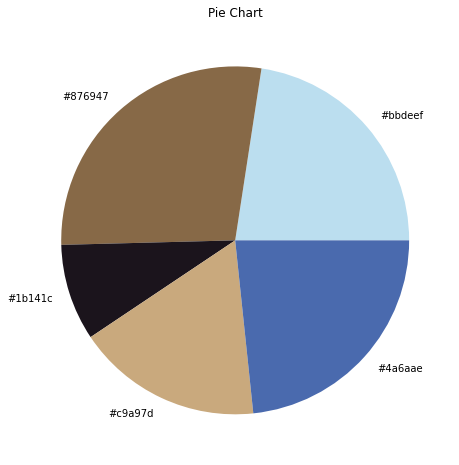

In [17]:
plt.figure(figsize=(12,8))
plt.title("Pie Chart")
plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
plt.savefig(f'{img_name[:-4]}-analysis.png') #f for expressions inside()